In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from  scipy.io import loadmat
import seaborn as sns
%matplotlib inline
sns.set(context="notebook", style="white")

# K-means Clustering

In [4]:
data = loadmat('data/ex7data1.mat')
X = data['X']

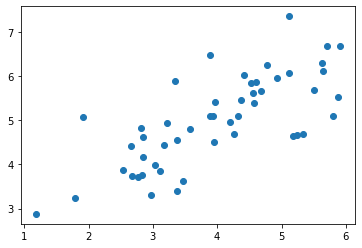

In [6]:
plt.scatter(X[:,0],X[:,1])

In [8]:
def euclidean_sq(x, y):
    return np.sum((x - y)**2) #欧式距离的平方
    

In [29]:
def findClosestCentroids(X,Centroids): 
    # 为数据集中每个点找到与其最近的 中心点， 并将其归入该中心点的类 
    # 即把最近中心点的index赋给这个点
    index_ll = np.zeros(X.shape[0])
    for i in range(len(X)):
        dist = 999999999
        for j in range(len(Centroids)):
            cur_dist = euclidean_sq(X[i],Centroids[j])
            if cur_dist < dist:
                dist = cur_dist
                index_ll[i] = j
    return index_ll

In [81]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [60]:
from sklearn.cluster import KMeans

In [62]:
X= loadmat('data/ex7data2.mat')['X']

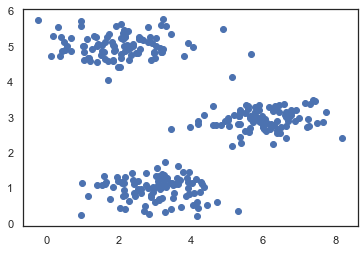

In [79]:
plt.scatter(X[:,0],X[:,1])

In [66]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [83]:
Centroids = kmeans.cluster_centers_
Centroids

array([[6.03366736, 3.00052511],
       [1.95399466, 5.02557006],
       [3.04367119, 1.01541041]])

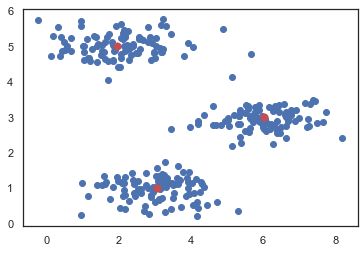

In [93]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(Centroids[:,0],Centroids[:,1],color='r',s=50) 

# 图中红色的点为kmeans算法计算的中心

#  Image compression with K-means 将kmeans算法用于图像压缩

In [129]:
img = loadmat('data/bird_small.mat')['A']
img.shape

(128, 128, 3)

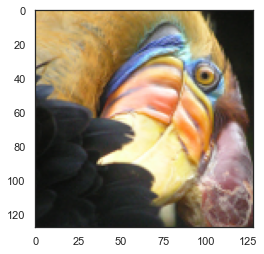

In [178]:
plt.imshow(img)

In [138]:
img_ll = []

In [139]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_ll.append(img[i][j])

In [145]:
tmp = pd.DataFrame(img_ll)
pixels = tmp.values
pixels.shape

(16384, 3)

In [146]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(pixels)

KMeans(n_clusters=16)

In [152]:
centers = kmeans.cluster_centers_

In [154]:
index_ll = findClosestCentroids(pixels,centers) #找到原画中每个像素点与之最近邻的中心，并把中心的index返回

In [180]:
centers = centers.astype(int) #将像素点的值变为整数
index_ll = index_ll.astype(int)
re_pixels = centers[index_ll] # # map each pixel to the centroid value
re_pixels.shape

(16384, 3)

In [182]:
re_pixels = re_pixels.reshape(128,128,3)

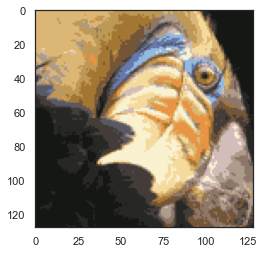

In [183]:
plt.imshow(re_pixels)

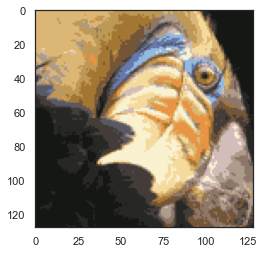

In [192]:
# 以上是用自己写的 findClosestCentroids 方法来找到最近邻点。 我们当然也可以使用sklearn中的predict 方法
index = kmeans.predict(pixels)
re_pixels2 = centers[index]
re_pixels2 = re_pixels2.reshape(128,128,3)
plt.imshow(re_pixels2)

# 可以看到图像的色彩不如原先丰富艳丽了，但是图像的size变小了

# Principal Component Analysis （PCA） 

In [202]:
X = loadmat('data/ex7data1.mat')['X']
X.shape

(50, 2)

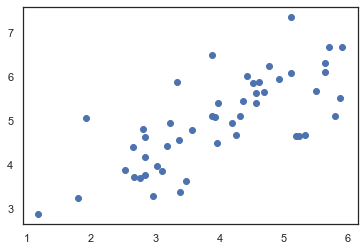

In [203]:
plt.scatter(X[:,0],X[:,1])

In [219]:
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()
    
    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    # perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

matrix([[50.        , 36.77651882],
        [36.77651882, 50.        ]])